In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sbn
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
import h5py

In [2]:
seed = 7
np.random.seed(seed)

## Show two sample images

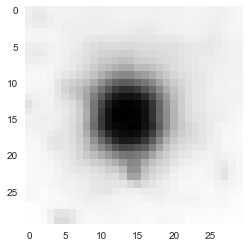

In [3]:
x_0 = cv2.imread('augmented_images_of_stars/object_1.jpg', 0)
#x_0 = cv2.cvtColor(x_0, cv2.COLOR_BGR2GRAY)
plt.grid(False)
plt.imshow(x_0)
plt.show()

In [4]:
x_0.shape

(30, 30)

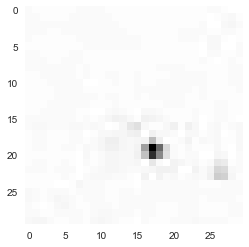

In [5]:
x_0 = cv2.imread('augmented_images_of_empty_space/object_1.jpg', 0)
#x_0 = cv2.cvtColor(x_0, cv2.COLOR_BGR2GRAY)
plt.grid(False)
plt.imshow(x_0)
plt.show()

In [6]:
x_0.shape

(30, 30)

## Load images

In [7]:
x = []
y = []

for j in range(1,1013):
    image_filename = 'augmented_images_of_stars/object_%d.jpg'%j
    image = cv2.imread(image_filename, 0)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #cv2.resize(image, (40, 40))
    x.append(image)
    y.append(1)

In [8]:
for j in range(1,1013):
    image_filename = 'augmented_images_of_empty_space/object_%d.jpg'%j
    image = cv2.imread(image_filename, 0)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #cv2.resize(image, (40, 40))
    x.append(image)
    y.append(0)

## Convert lists to arrays

In [9]:
x = np.array(x)
#x = np.array(x, dtype=np.float32)
y = np.array(y)
#x,y = shuffle(x, y)

In [10]:
x.shape

(2024, 30, 30)

## Split the data into train and test sets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.1, 
                                                    stratify=y)

## Reshape the data for the deep learning model

In [12]:
num_classes = 2
img_rows, img_cols = 30, 30
input_shape = (img_rows, img_cols, 1)

In [13]:
x_train.shape[0]

1821

In [14]:
x_test.shape[0]

203

In [15]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#x_train /= 255
#x_test /= 255

## Build the deep learning model (CNN)

In [16]:
model = Sequential()
model.add(Conv2D(filters=20, kernel_size=(3,3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

## Train the model

In [18]:
callbacks = [EarlyStopping(monitor='val_loss', 
                           patience=4),
             ModelCheckpoint(filepath='best_model.h5', 
                             monitor='val_loss', 
                             save_best_only=True)]

In [19]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=100, 
                    epochs=10,
                    callbacks=callbacks,
                    validation_split=0.10
                   )

Train on 1638 samples, validate on 183 samples
Epoch 1/10
1638/1638 [==============================] - 1s 612us/step - loss: 3.1183 - acc: 0.6087 - val_loss: 1.1242 - val_acc: 0.8852
Epoch 2/10
1638/1638 [==============================] - 1s 405us/step - loss: 0.8009 - acc: 0.9023 - val_loss: 0.4794 - val_acc: 0.9290
Epoch 3/10
1638/1638 [==============================] - 1s 427us/step - loss: 0.2541 - acc: 0.9573 - val_loss: 0.6794 - val_acc: 0.9235
Epoch 4/10
1638/1638 [==============================] - 1s 424us/step - loss: 0.3910 - acc: 0.9463 - val_loss: 0.1663 - val_acc: 0.9781
Epoch 5/10
1638/1638 [==============================] - 1s 407us/step - loss: 0.3536 - acc: 0.9463 - val_loss: 0.3258 - val_acc: 0.9563
Epoch 6/10
1638/1638 [==============================] - 1s 419us/step - loss: 1.1582 - acc: 0.9017 - val_loss: 0.7047 - val_acc: 0.8743
Epoch 7/10
1638/1638 [==============================] - 1s 414us/step - loss: 0.1855 - acc: 0.9670 - val_loss: 0.0742 - val_acc: 0.9891
E

In [20]:
history.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']

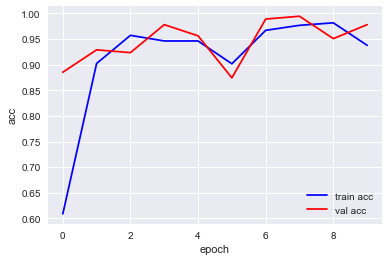

In [21]:
plt.plot(history.epoch, history.history['acc'], c='b', label='train acc')
plt.plot(history.epoch, history.history['val_acc'], c='r', label='val acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Make predictions

In [22]:
y_pred = model.predict_classes(x_test)[:, 0]#np.round(model.predict(x_test))[:, 0]

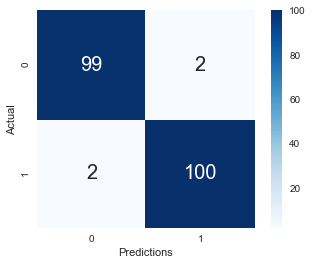

In [23]:
table = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predictions'])

sbn.heatmap(table, cbar=True, cmap='Blues',annot=True, square=True, fmt='d', annot_kws={'size': 20})

plt.show()

## Evaluate the model

In [24]:
model.evaluate(x_test, y_test, verbose=0) # [loss, accuracy]

[0.09047899300948226, 0.9802955665024631]

## Save and load the model

In [25]:
model.save('DL_model.h5')

In [26]:
model2 = load_model('DL_model.h5')

In [27]:
model2.predict(x_test)[0:10,0] # probability to belong to the class 1

array([1.0000000e+00, 3.1859557e-07, 1.0000000e+00, 9.5763039e-03,
       9.6254915e-09, 1.0000000e+00, 1.8437097e-02, 4.2568284e-04,
       1.0000000e+00, 8.1642204e-09], dtype=float32)

In [28]:
model2.predict_classes(x_test)[0:10,0] # classes

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int32)

In [29]:
y_test[0:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0])